<img src="../img/logo.jpg" alt="header" style="height:200px;">
<h1><center>Practica 2 Resizing</center></h1>
<h3><b>Alumno:</b> Mothelet Delgado Izaird Alexander</h3>
<h3><b>Boleta:</b> 2012010743</h3>
<h3><b>Grupo:</b> 3CV7</h3>
<h2><center><b>Introducción</b></center></h2>
<p>Cambiar el tamaño de una imagen es una herramienta bastante util ya que nos permite ajustar esta a nuestras necesidades, aunque este proceso necesita de varios pasos para ser realizado. Tales como muestreo, cuantización, etc. Hablaremos de todos pasos en profundidad.</p>

<h2>Muestreo y Cuantización</h2>
<p>Para ser adecuado para el procesamiento digital, una función de imagen f (x, y) debe digitalizarse tanto espacial como en amplitud. Por lo general, se usa un capturador de cuadros o un digitalizador para muestrear y cuantificar la señal de video analógica. Por lo tanto, para crear una imagen que sea digital, necesitamos convertir datos continuos en forma digital. Hay dos pasos para hacerlo:
</p>
<ul>
    <li>Muestreo</li>
    <li>Cuantización</li>
</ul>
<p>
La frecuencia de muestreo determina la resolución espacial de la imagen digitalizada, mientras que el nivel de cuantificación determina el número de niveles de gris en la imagen digitalizada. Una magnitud de la imagen muestreada se expresa como un valor digital en el procesamiento de imágenes. La transición entre valores continuos de la función de imagen y su equivalente digital se llama cuantización.

El número de niveles de cuantización debe ser lo suficientemente alto para la percepción humana de detalles finos de sombreado en la imagen. La aparición de contornos falsos es el principal problema en la imagen que se ha cuantificado con niveles de brillo insuficientes.
</p>

<img src="../img/ejemplo.jpg" alt="ejemplo" style="height:600px;">


<h2>Interpolación</h2>
<p>La interpolación de imágenes se produce en todas las fotos digitales en algún momento. Ocurre cada vez que cambia el tamaño o reasigna (distorsiona) su imagen de una cuadrícula de píxeles a otra. El cambio de tamaño de la imagen es necesario cuando necesita aumentar o disminuir el número total de píxeles, mientras que la reasignación puede ocurrir en una variedad más amplia de escenarios: corregir la distorsión de la lente, cambiar la perspectiva y rotar una imagen.</p>
<img src="../img/inter_intro.png" alt="grhap2" >


<p>Incluso si se realiza el mismo cambio de tamaño o reasignación de la imagen, los resultados pueden variar significativamente según el algoritmo de interpolación. Es solo una aproximación, por lo tanto, una imagen siempre perderá algo de calidad cada vez que se realice la interpolación. </p>
<h4>Concepto</h4>
<p>La interpolación funciona utilizando datos conocidos para estimar valores en puntos desconocidos. Por ejemplo: si desea conocer la temperatura al mediodía, pero solo la mide a las 11 a.m. y a la 1 p.m., puede estimar su valor realizando una interpolación lineal: </p>
<img src="../img/inter_1.png" alt="grhap1" >

<p>Si tuviera una medición adicional a las 11:30 a.m., podría ver que la mayor parte del aumento de temperatura ocurrió antes del mediodía y podría usar este punto de datos adicional para realizar una interpolación cuadrática: </p>
<img src="../img/inter_2.png" alt="grhap2" >

<p>Cuantas más mediciones de temperatura tenga cerca del mediodía, más sofisticado (y con suerte más preciso) puede ser su algoritmo de interpolación. </p>
<h2>Diezmado</h2>
<p>Es el proceso de reducir la frecuencia de muestreo de una señal. Complementario a la interpolación, que aumenta la frecuencia de muestreo, es un caso específico de conversión de frecuencia de muestreo en un sistema de procesamiento de señal digital de frecuencia múltiple. La decimación utiliza el filtrado para mitigar la distorsión de alias, que puede ocurrir al simplemente reducir la señal. Un componente del sistema que realiza la decimación se denomina decimador.</p>

<p>En general</p></p>
<p>El diezmado reduce la velocidad de datos o el tamaño de los datos. El factor de diezmado suele ser un número entero o una fracción racional mayor que uno. Este factor multiplica el tiempo de muestreo o, de manera equivalente, divide la frecuencia de muestreo. Por ejemplo, si el audio de disco compacto de 16 bits (muestreado a 44,100 Hz) se diezma a 22,050 Hz, se dice que el audio se diezma por un factor de 2. La velocidad de bits también se reduce a la mitad, de 1,411,200 bit / s a 705,600 bit / s, suponiendo que cada muestra conserva su profundidad de 16 bits.</p>

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


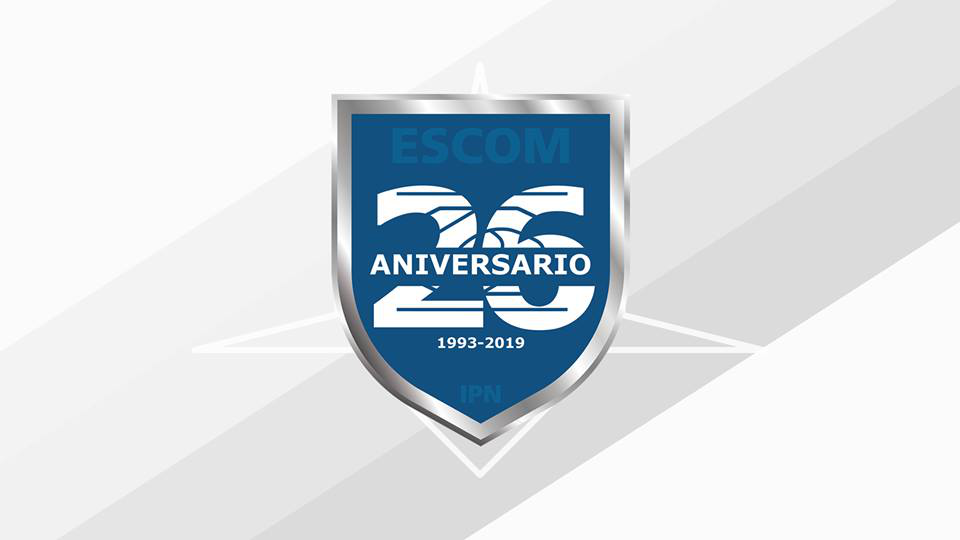

In [3]:
import math
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
%load_ext cython
%matplotlib inline
filepath="../img/" #The current directory
#filename="mark.jpeg" #The File name
filename="logo.jpg"
pic=Image.open(filepath+filename) #Open the image and convert to gray scale 
pic #Diplays the image in the notebook

In [5]:
pic_arr = np.asarray(pic,np.uint) #converts the image to an Numpy Array
pic_arr.shape #(height,width,#of channels)
H=pic_arr.shape[0]
W=pic_arr.shape[1]
#for i in range (0,W):
print(H,W,pic_arr.shape[2])
print(pic_arr.dtype)

540 960 3
uint32


In [ ]:
plt.imshow(pic_arr)

In [15]:
newHeight=4000
newWidth=4000
res_picW= np.ones([H, newWidth,3],np.uint)
res_pic= np.ones([newHeight,newWidth,3],np.uint)
print(res_pic.shape)
print(res_pic.dtype)
print(res_picW.shape)
print(res_picW.dtype)

(4000, 4000, 3)
uint32
(540, 4000, 3)
uint32


In [10]:
basefactorW = W/newWidth
factorH = H/newHeight
print("Width factor", basefactorW)
print("H factor", factorH)
for i in range (0,H): 
    res_picW[i,0,0:3]=pic_arr[i,0,0:3]
    res_picW[i,-1,0:3]=pic_arr[i,-1,0:3]
    for j in range (1,newWidth-1):
        x=basefactorW*j
        x1 = math.floor(x)
        x2 = math.ceil(x)
        if(x1>=W or x2>=W):
            x1 = W-1
            x2 = W-1
        
            
        y1 = pic_arr[i,x1,0]
        y2 = pic_arr[i,x2,0]
        if(x1 == x2):
            y= y1
        else:
            
            op1=(int(y2)-int(y1))/(x2 - x1)
            op2=x-x1
            op3=op1*op2
            y = op3+y1
            
        res_picW[i,j,0:3] = int(round(y))


Width factor 0.24
H factor 0.135


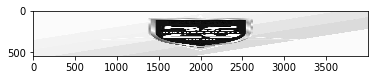

In [11]:
plt.imshow(res_picW)

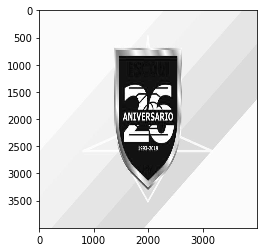

In [14]:
for i in range (0,newWidth): 
    res_pic[0,i,0:3]=res_picW[0,i,0:3]
    res_pic[-1,i,0:3]=res_picW[-1,i,0:3]
    for j in range (1,newHeight-1):
        x=factorH*j
        x1 = math.floor(x)
        x2 = math.ceil(x)
        if(x1>=H or x2>=H):
            x1 = H-1
            x2 = H-1
        y1 = res_picW[x1,i,0]
        y2 = res_picW[x2,i,0]
        if(x1 == x2):
            y= y1
        else:
            
            op1=(int(y2)-int(y1))/(x2 - x1)
            op2=x-x1
            op3=op1*op2
            y = op3+y1
            
        res_pic[j,i,0:3] = int(round(y))
plt.imshow(res_pic)